<hr style="height:1px">

**Autores**: <b>(</b> JAVIER BLANCO ÁLVAREZ <b>) (</b> PABLO CASTAÑEDA FUENTES <b>) (</b> JESÚS ALBERTO GALLINAL MORENO <b>)</b>.

**Fecha**: 18/06/2024.

**Asignatura**: *Modelización y Valoración de Derivados y Carteras en Finanzas*.

**Actividad Grupal**: Construcción de una cartera financiera de mínimo riesgo.

<hr style="height:1px">

# 1. Planteamiento y obtención de los datos.

En esta actividad se pretende obtener una *cartera de mínimo riesgo* de al menos tres activos y graficar la *frontera eficiente de Markowitz* a partir de una fuente de datos de las cotizaciones de esos activos.

La fuente de datos es de **[Yahoo! finanzas](https://es.finance.yahoo.com/quote/%5EIBEX/components)** donde se pueden escoger activos bancarios como *BBVA*, *Banco Santander*, *CaixaBank*, *Bankinter* y *Banco Sabadell* que forman parte del *IBEX-35*.

La fuente de datos se va a descargar online directamente usando la *URL* debidamente paramétrizada para descargar los datos, pudiéndose elegir el intervalo de tiempo desde el doble del número de días del tamaño inicial de la muestra $N$ deseado hasta el instante elegido en el código (1 de junio de 2024).

La tabla de la fuente de datos así obtenida se filtra para quedarse con las columnas de *fechas* y *cierres* (*cotizaciones*) además de añadir una columna de *tiempos* con la que se indexan las filas que representan días hábiles. De la tabla filtrada sólo se escogerán las $N$ últimas filas y de esas filas se escogerán las que estén cada $\Delta{t}$ días.

Por defecto, $N=100$ días y $\Delta{t}=1$ día, hábiles.

Finalmente, se muestra la gráfica de los datos que se van a utilizar para obtener una cartera de mínimo riesgo...

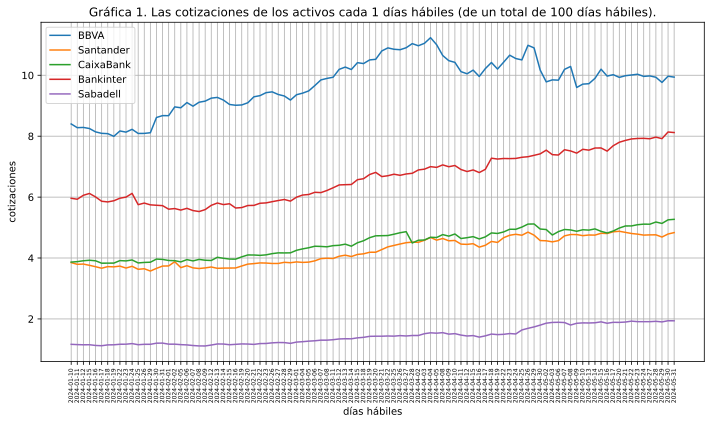

In [1]:
%config InlineBackend.figure_format = 'svg' # para mejorar la calidad visual de las gráficas...
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from urllib.error import HTTPError
import time
import datetime
from IPython.display import display, Latex, HTML

# Variables globales del programa...
N = 100 # tamaño de la muestra (en días hábiles), se puede cambiar
DELTA_T = 1 # longitud del intervalo de tiempo (en días hábiles), se puede cambiar, importante: 1 <= DELTA_T < N/2
#HASTA = int(time.time()) # con esta línea se recuperarían los datos hasta el momento actual
HASTA = int(datetime.datetime(2024, 6, 1).timestamp()) # momento elegido: 1 de junio de 2024, se puede cambiar
DESDE = HASTA - 2*N*24*60*60 # se toman el doble días para tener suficientes con los que quedarse
ACTIVOS = {'BBVA': 'BBVA', 'Santander': 'SAN', 'CaixaBank': 'CABK', 'Bankinter': 'BKT', 'Sabadell': 'SAB'}
#ACTIVOS = {'Aena': 'AENA', 'Acciona': 'ANA', 'Amadeus': 'AMS'}
KACTIVOS = list(ACTIVOS)
VACTIVOS = list(ACTIVOS.values())
COLUMNAS = {'Date': 'días hábiles', 'Close': 'cotizaciones'}
KCOLUMNAS = list(COLUMNAS)
VCOLUMNAS = list(COLUMNAS.values())

# Función que consigue la fuente de datos del activo desde Internet...
def consigue_fuente_datos():
    '''
    Consigue los datos de las cotizaciones de los activos escogidos desde Internet de manera online.

    Parámetros
    ----------
    No tiene.

    Retorno
    -------
    Tabla de datos de las cotizaciones de los activos escogidos.
    '''
    ret = []

    try:
        for va in VACTIVOS:
            url_fuente_datos = f'https://query1.finance.yahoo.com/v7/finance/download/{va}.MC?period1={DESDE}&period2={HASTA}&interval=1d&events=history&includeAdjustedClose=true'
            ret.append(pd.read_csv(url_fuente_datos))
    except HTTPError:
        print('Error accediendo a fuente de datos en línea...\nNo se puede continuar.\n')

    return ret

# Función que consigue los datos filtrados del activo...
def consigue_datos_filtrados(fuente_datos, tamagno_muestra, delta_t=1):
    '''
    Consigue los datos filtrados de las cotizaciones de los activos.

    Parámetros
    ----------
    fuente_datos : tabla de datos obtenidos con la función 'consigue_fuente_datos()'.
    tamagno_muestra : tamaño de la muestra (número de días de cotizaciones).
    delta_t : paso de la muestra, por defecto es 1 día.

    Retorno
    -------
    Tabla de datos filtrados de las cotizaciones de los activos escogidos.
    '''
    ret = []

    for fd in fuente_datos:
        if (isinstance(fd, pd.DataFrame)):
            #display(fd)
            tmp = fd[KCOLUMNAS].copy() # se queda con las columnas de fecha y cierre (cotización)
            tmp = tmp.iloc[-tamagno_muestra:] # se queda con los últimos días hábiles del tamaño de la muestra elegido
            tmp.insert(1, 't', list(range(tamagno_muestra))) # se inserta columna de tiempos

        ret.append(tmp[::delta_t]) # se muestrea la tabla para el delta_t elegido

    return ret

# Función que pinta la gráfica de los datos del activo...
def pinta_grafica_datos(datos, delta_t=1):
    '''
    Pinta la gráfica de las cotizaciones diarias de la muestra para cada activo.

    parámetros
    ----------
    datos : dataframe de los datos filtrados de las cotizaciones de los activos.
    delta_t : paso de la muestra, por defecto es 1 día.

    retorno
    -------
    No devuelve nada, sólo pinta la gráfica.
    '''
    plt.figure(figsize=(10, 6))
    i = 0

    for d in datos:
        if (isinstance(d, pd.DataFrame)):
            plt.plot(d[KCOLUMNAS[0]], d[KCOLUMNAS[1]], label=f'{KACTIVOS[i]}')
            i = i+1

    plt.title(f'Gráfica 1. Las {VCOLUMNAS[1]} de los activos cada {delta_t} {VCOLUMNAS[0]} (de un total de {delta_t*len(d)} {VCOLUMNAS[0]}).')
    plt.ylabel(VCOLUMNAS[1])
    plt.xlabel(VCOLUMNAS[0])

    if N < 300:
        plt.xticks(rotation=90, fontsize=min(600/len(d), 8))
        plt.grid(True)
    else:
        plt.xticks([0, round(N/4), round(N/2), round(3*N/4), N-1])
        plt.grid(False)

    plt.tight_layout()
    plt.legend()
    plt.show()

# Se procede a descargar y filtrar la fuente de datos de los activos...
mis_datos = consigue_datos_filtrados(consigue_fuente_datos(), N, DELTA_T)
#display(mis_datos)

# Se pinta la gráfica de los datos del activo...
pinta_grafica_datos(mis_datos, DELTA_T)


# 2. Cálculo del *retorno* $R_i$, *retorno esperado* $\mu_i$ y *riesgo* $\sigma_i^2$ para cada activo, y cálculo de la *matriz $C$ de varianzas y covarianzas* de *retornos*.

A continuación se procede a calcular los *retornos* $R_{i,j}$, el *retorno* $R_i$, el *retorno esperado* $\mu_i$ y el *riesgo* $\sigma_i^2$ de cada activo, y la *matriz de varianzas y covarianzas* $C$ de los *retornos* de los activos, con los datos filtrados anteriormente.

Para el activo $i$-ésimo se tiene que:

$$R_{i,j}=\log{\left(\frac{\nu_{_{i,j+1}}}{\nu_{_{i,j}}}\right)}\,,\qquad R_i=\sum_{j=0}^{T-1}R_{i,j}=\log\left(\frac{\nu_{_{i,T}}}{\nu_{_{i,0}}}\right)\,,\qquad\mu_i=E(R_{i,j})\,,\qquad\sigma_i^2=V(R_{i,j})\,,\qquad C=\begin{pmatrix}
\sigma_{_1}^2 & \rho_{_{1,2}}\sigma_{_1}\sigma_{_2} & \cdots & \rho_{_{1,n}}\sigma_{_1}\sigma_{_n} \\
\rho_{_{2,1}}\sigma_{_2}\sigma_{_1} & \sigma_{_2}^2 & \ddots & \vdots \\
\vdots & \ddots & \ddots & \rho_{_{n-1,n}}\sigma_{_{n-1}}\sigma_{_n} \\
\rho_{_{n,1}}\sigma_{_n}\sigma_{_1} & \cdots & \rho_{_{n,n-1}}\sigma_{_n}\sigma_{_{n-1}} & \sigma_{_n}^2 \\
\end{pmatrix}$$

en donde $\nu_{_{i,T}}$ y $\nu_{_{i,0}}$ representan las *cotizaciones* en el instante final $T$ y el inicial $0$, respectivamente, $\sigma_i^2$ son las *varianzas*, $\sigma_i$ son las *desviaciones típicas*, $\rho_{i,j}$ los *coeficientes de correlación*, $\rho_{i,j}\sigma_i\sigma_j=\sigma_{i,j}$ las *covarianzas*, con $\rho_{i,i}=1$, y $\rho_{i,j}=\rho_{j,i}$, si $i\neq j$, entonces $C$ siempre es *simétrica*, para cada activo $i$-ésimo y $j$-ésimo.

,$R_i$,$\mu_i$,$\sigma_i$
BBVA,0.168097,0.001698,0.000355
Santander,0.227964,0.002303,0.000221
CaixaBank,0.309810,0.003129,0.000237
Bankinter,0.308924,0.003120,0.000195
Sabadell,0.508335,0.005135,0.000361


,BBVA,Santander,CaixaBank,Bankinter,Sabadell
BBVA,0.000355,0.000177,0.000112,0.000079,0.000076
Santander,0.000177,0.000221,0.000102,0.000089,0.000088
CaixaBank,0.000112,0.000102,0.000237,0.000112,0.000097
Bankinter,0.000079,0.000089,0.000112,0.000195,0.000137
Sabadell,0.000076,0.000088,0.000097,0.000137,0.000361


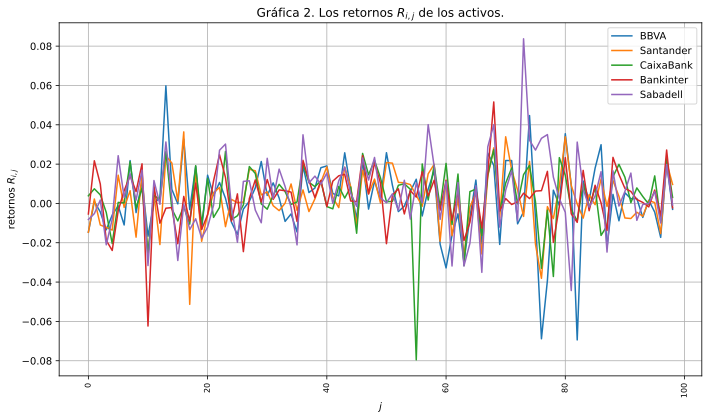

In [2]:
# Función que consigue los retornos y riesgos para cada activo, y la matriz de varianzas y covarianzas...
def consigue_retornos_riesgos_covarianzas(datos):
    '''
    Calcula los retornos y riesgos para cada activo, y la matriz de varianzas y covarianzas.

    Parámetros
    ----------
    datos : dataframe de los datos filtrados de las cotizaciones de los activos.

    Retorno
    -------
    Vector con el retorno esperado, el riesgo, el retorno del periodo, los retornos en cada día, y la matriz de varianzas y covarianzas.
    '''
    ret_retorno_esperado = []
    ret_riesgo = []
    ret_retorno = []
    ret_retornos = []
    val_ddof = 0
    #val_ddof = 1 # si usamos (co)varianza muestral, sería mejor usar este valor que es insesgado, pero lo dejo así...

    for d in datos:
        if (isinstance(d, pd.DataFrame)):
            retornos = np.log(d[KCOLUMNAS[1]].iloc[1:].values / d[KCOLUMNAS[1]].iloc[:-1].values) # log de ratios
            retorno_esperado = np.mean(retornos)
            riesgo = np.var(retornos, ddof=val_ddof)
            retorno = math.log(d[KCOLUMNAS[1]].iloc[-1] / d[KCOLUMNAS[1]].iloc[0]) # = np.sum(retornos) = retorno_esperado*len(retornos)
            ret_retorno_esperado.append(retorno_esperado)
            ret_riesgo.append(riesgo)
            ret_retorno.append(retorno)
            ret_retornos.append(retornos)

    return [ret_retorno_esperado, ret_riesgo, ret_retorno, ret_retornos, np.cov(ret_retornos, ddof=val_ddof)]

# Función que pinta la gráfica de los retornos de los activos...
def pinta_grafica_retornos(indice_j, retornos):
    '''
    Pinta la gráfica de retornos diarios de la muestra para cada activo.

    Parámetros
    ----------
    indice_j : índice j que representa cada día de la muestra.
    retornos : vector de retornos diarios

    Retorno
    -------
    No devuelve nada, sólo pinta la gráfica.
    '''
    plt.figure(figsize=(10, 6))

    if (isinstance(retornos, pd.DataFrame)):
        for ka in KACTIVOS:
            plt.plot(retornos[indice_j], retornos[ka], label=f'{ka}')

    plt.title('Gráfica 2. Los retornos $R_{i,j}$ de los activos.')
    plt.xlabel(indice_j)
    plt.ylabel('retornos $R_{i,j}$')
    plt.xticks(rotation=90, fontsize=min(600/len(ka), 8))
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

# Se consiguen los retornos y riesgos para cada activo, y la matriz de varianzas y covarianzas...
rms = consigue_retornos_riesgos_covarianzas(mis_datos)

# Tabulo los retornos esperados y riesgos de cada activo...
tabla_param_activos1 = pd.DataFrame({'$R_i$': rms[2], '$\mu_i$': rms[0], '$\sigma_i$': rms[1]}, index=KACTIVOS)
tabla_param_activos2 = tabla_param_activos1.style.set_properties(**{'text-align': 'center'}).set_table_styles([dict(selector='th', props=[('text-align', 'center')])]).set_caption('<h4>Tabla 1. Parámetros $R_i$, $\mu_i$ y $\sigma_i$ de cada activo.</h4>')
display(tabla_param_activos2)

# Muestro la matriz de varianzas y covarianzas...
C = pd.DataFrame(rms[4], index=KACTIVOS, columns=KACTIVOS)
C2 = C.style.set_properties(**{'text-align': 'center'}).set_table_styles([dict(selector='th', props=[('text-align', 'center')])]).set_caption('<h4>Tabla 2. Matriz $C$ de varianzas y covarianzas.</h4>')
display(C2)

# Tabulo los retornos en cada instante...
indice_j = '$j$'
tabla_retornos1 = pd.DataFrame(np.transpose([np.arange(len(rms[3][0]))] + rms[3]), columns=[indice_j]+KACTIVOS).astype({indice_j: 'int'})
tabla_retornos2 = tabla_retornos1.style.set_properties(**{'text-align': 'center'}).set_table_styles([dict(selector='th', props=[('text-align', 'center')])]).set_caption('<h4>Tabla 2. Retornos $R_{i,j}$ de cada activo.</h4>')
#display(tabla_retornos2.hide()) # así se ocultan los índices de las filas
#tabla_retornos1.to_csv('tabla_retornos.csv')

# Se pinta la gráfica de los retornos de los activos...
pinta_grafica_retornos(indice_j, tabla_retornos1)


# 3. Planteamiento del programa de minimización del *riesgo* $\sigma^2$ de la cartera.

La finalidad de esta actividad es calcular el *vector de pesos* $\vec{\omega}$ con el que ponderar los $n$-activos de nuestra cartera de manera que se ***minimice*** la *función objetivo riesgo* $\sigma^2(\vec{\omega})$ de la misma:

$$\text{programa de minimización }(1)\equiv\left\{\begin{array}{l}
\quad\sigma^2(\vec{\omega})=\vec{\omega}\cdot{C}\cdot{\vec{\omega}}^t\,,\qquad\text{con}\quad\vec{\omega}=(\omega_1,\ldots,\omega_n)\in\mathbb{R}^n\\[2ex]
\quad\min{\left(\sigma^2(\vec{\omega})\right)}\\[2ex]
\quad\text{sujeto a:}\quad\displaystyle\sum_{k=1}^n{\omega_k}=1\quad\equiv\quad\vec{1}\cdot\vec{\omega}^t=1\,,\qquad\text{con}\quad\vec{1}=(\ \underbrace{1,\ldots,1}_{n\rm-veces}\ )
\end{array}\right.$$

la *función objetivo riesgo* $\sigma^2$ es continua, con *gradiente* continuo: $\nabla\sigma^2=2\,\vec{\omega}\cdot{C}$ , con *matriz hessiana* definida positiva: $H_{\sigma^2}=2C$ , porque $C$ lo es, por lo que $\sigma^2$ es *convexa* y por tanto tiene *mínimo*; y la *restricción* $h(\vec{\omega})=1-\vec{1}\cdot\vec{\omega}^t$ , es continua con *gradiente* continuo: $\nabla h(\vec{\omega})=-\vec{1}$ .

Para calcular los *puntos críticos o estacionarios*, que se denotan por $\vec{\omega}^*=(\omega_1^*,\ldots,\omega_n^*)$ , del *programa de minimización* $(1)$ , se empleará el *método de los multiplicadores de Lagrange*, en este caso el *multiplicador* $\lambda$ , que consiste en considerar la siguiente función:

$$Z\left(\lambda,\vec{\omega}\right)=\sigma^2(\vec{\omega})+\lambda\,h(\vec{\omega})=\vec{\omega}\cdot{C}\cdot{\vec{\omega}}^t+\lambda\,\left(1-\vec{1}\cdot\vec{\omega}^t\right)$$

de manera que los *puntos críticos o estacionarios* deben cumplir que:

$$\left\{\begin{array}{l}
\quad\displaystyle\frac{\partial{Z}}{\partial{\lambda}}\Bigg|_{\left(\lambda^*,\,\vec{\omega}^*\right)}=0\quad\Longrightarrow\quad 1-\vec{1}\cdot{\vec{\omega}^*}^t=0\quad\Longrightarrow\quad\boxed{\vec{\omega}^*\cdot\vec{1}^t=1}\\[2ex]
\quad\displaystyle\frac{\partial{Z}}{\partial{\vec{\omega}}}\Bigg|_{\left(\lambda^*,\,\vec{\omega}^*\right)}=\nabla_\vec{\omega}Z\left(\lambda^*,\,\vec{\omega}^*\right)=\vec{0}\quad\Longrightarrow\quad 2\,\vec{\omega}^*\cdot{C}-\lambda^*\,\vec{1}=\vec{0}\quad\Longrightarrow\quad\vec{\omega}^*=\frac{\lambda^*}{2}\,\vec{1}\cdot{C^{-1}}\quad\Longrightarrow\quad\text{con la igualdad anterior...}\\[2ex]
\qquad\qquad\qquad\quad\displaystyle\vec{\omega}^*\cdot\vec{1}^t=\frac{\lambda^*}{2}\,\vec{1}\cdot{C^{-1}}\cdot\vec{1}^t\quad\Longrightarrow\quad
1=\frac{\lambda^*}{2}\,\vec{1}\cdot{C^{-1}}\cdot\vec{1}^t\quad\Longrightarrow\quad\boxed{\lambda^*=\frac{2}{\vec{1}\cdot{C^{-1}}\cdot\vec{1}^t}}\quad\Longrightarrow\quad\boxed{\vec{\omega}^*=\frac{\vec{1}\cdot{C^{-1}}}{\vec{1}\cdot{C^{-1}}\cdot\vec{1}^t}}
\end{array}\right.$$

y así, el *riesgo mínimo* $\sigma_\text{min}^2$ de la cartera óptima será:

$$\min{\left(\sigma^2(\vec{\omega})\right)}=\sigma^2(\vec{\omega}^*)=\boxed{\sigma_\text{min}^2=\vec{\omega}^*\cdot{C}\cdot{\vec{\omega}^*}^t}$$

y el *retorno esperado* $\mu^*$ de la cartera óptima será:

$$\mu^*=\sum_{k=1}^n \mu_k\,\omega_k^*\quad\Longrightarrow\quad\boxed{\mu^*=\vec{\mu}\cdot{\vec{\omega}^*}^t}\,,\qquad\text{con}\quad\vec{\mu}=(\mu_1,\ldots,\mu_n)$$

In [3]:
# Hago los cálculos matriciales...
C = np.array(rms[4])
Cinv = np.linalg.inv(C)
unos = np.ones(len(rms[3]))
numerador = unos @ Cinv
unos_tras = unos.T
denominador = numerador @ unos_tras
omega_ast = numerador/denominador
lambda_ast = 2/denominador
omega_ast_tras = omega_ast.T
riesgo_min_cartera = omega_ast @ C @ omega_ast_tras
mu = np.array(rms[0])
mu_ast = mu @ omega_ast_tras

# Tabulo los pesos óptimos...
tabla_ast1 = pd.DataFrame(omega_ast, index=KACTIVOS, columns=['$\omega_i^*$']).transpose()
tabla_ast2 = tabla_ast1.style.set_properties(**{'text-align': 'center'}).set_table_styles([dict(selector='th', props=[('text-align', 'center')])]).set_caption('<h4>Tabla 3. <i>Pesos óptimos</i> $\omega_i^*$ de cada activo.</h4>')
display(tabla_ast2)

# Muestro los parámetros óptimos...
display(Latex(r'${msg}$'.format(msg=r'\text{Resto de parámetros óptimos...}')))
display(Latex(f'$\lambda^*=$ {lambda_ast}'))
display(HTML('<a id="Apartado_3_Out"></a>'))
display(Latex(f'$\mu^*=$ {mu_ast*100:.2f} %'))
display(Latex(r'$\sigma_\text{{min}}^2=$ {val:.2f} %'.format(min='min', val=riesgo_min_cartera*100)))


,BBVA,Santander,CaixaBank,Bankinter,Sabadell
$\omega_i^*$,0.081247,0.265958,0.209874,0.338264,0.104657


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# 4. Gráfica de la *frontera eficiente de Markowitz*.

Se trata de relacionar la *raiz cuadrada* del *riesgo* $\sigma^2$ de la cartera para un *retorno esperado* $\mu$ prefijado de la cartera.

A partir de ahora llamaremos *riesgo* de la cartera a $\sigma$ y no a $\sigma^2$.

La *frontera eficiente de Markowitz* será la curva de puntos $(\sigma, \mu)$ solución del programa de minimización:

$$\text{programa de minimización }(2)\equiv\left\{\begin{array}{l}
\quad\sigma^2(\vec{\omega})=\vec{\omega}\cdot{C}\cdot{\vec{\omega}}^t\\[2ex]
\quad\min{\left(\sigma^2(\vec{\omega})\right)}\\[2ex]
\quad\text{sujeto a:}\quad\left\{\begin{array}{l}
\quad\vec{1}\cdot\vec{\omega}^t=1\\[1ex]
\quad\vec{\mu}\cdot{\vec{\omega}}^t=\mu
\end{array}\right.
\end{array}\right.$$

De manera análoga al *programa de minimización* $(1)$, en este caso se tiene un *vector de restricciones* $\vec{h}(\vec{\omega})=(1-\vec{1}\cdot\vec{\omega}^t,\quad\mu-\vec{\mu}\cdot{\vec{\omega}}^t)$, y para calcular los *puntos críticos o estacionarios*, que se denotan por $\vec{\omega}^*=(\omega_1^*,\ldots,\omega_n^*)$ , del *programa de minimización* $(2)$ , se empleará el *método de los multiplicadores de Lagrange*, en este caso se tiene un *vector de multiplicadores* $\vec{\lambda}=(\lambda_1,\lambda_2)$ , que consiste en considerar la siguiente función:

$$Z\left(\vec{\lambda},\vec{\omega}\right)=\sigma^2(\vec{\omega})+\vec{\lambda}\cdot{\vec{h}}^t(\vec{\omega})=\vec{\omega}\cdot{C}\cdot{\vec{\omega}}^t+\lambda_1\,(1-\vec{1}\cdot\vec{\omega}^t)+\lambda_2\,(\mu-\vec{\mu}\cdot{\vec{\omega}}^t)$$

de manera que los *puntos críticos o estacionarios* deben cumplir que:

$$\left\{\begin{array}{l}
\quad\displaystyle\frac{\partial{Z}}{\partial{\vec{\lambda}}}\Bigg|_{\left(\vec{\lambda}^*,\,\vec{\omega}^*\right)}=\nabla_\vec{\lambda}Z\left(\vec{\lambda}^*,\,\vec{\omega}^*\right)=\vec{0}\quad\Longrightarrow\quad\left(1-\vec{1}\cdot{\vec{\omega}^*}^t,\quad\mu-\vec{\mu}\cdot{\vec{\omega}^*}^t\right)=\vec{0}\quad\Longrightarrow\quad\boxed{\vec{\omega}^*\cdot\vec{1}^t=1}\,,\quad\boxed{\vec{\omega}^*\cdot\vec{\mu}^t=\mu}\\[2ex]
\quad\displaystyle\frac{\partial{Z}}{\partial{\vec{\omega}}}\Bigg|_{\left(\vec{\lambda}^*,\,\vec{\omega}^*\right)}=\nabla_\vec{\omega}Z\left(\vec{\lambda}^*,\,\vec{\omega}^*\right)=\vec{0}\quad\Longrightarrow\quad 2\,\vec{\omega}^*\cdot{C}-\lambda_1^*\,\vec{1}-\lambda_2^*\,\vec{\mu}=\vec{0}\quad\Longrightarrow\quad\vec{\omega}^*=\frac{1}{2}\,\left(\lambda_1^*\,\vec{1}+\lambda_2^*\,\vec{\mu}\right)\cdot{C^{-1}}\quad\Longrightarrow\quad\text{con las igualdades anteriores...}\\[2ex]
\qquad\quad\left\{\begin{array}{l}
\quad\displaystyle\vec{\omega}^*\cdot\vec{1}^t=\frac{1}{2}\,\left(\lambda_1^*\,\vec{1}+\lambda_2^*\,\vec{\mu}\right)\cdot{C^{-1}}\cdot\vec{1}^t\quad\Longrightarrow\quad
1=\frac{1}{2}\,\left(\lambda_1^*\,\vec{1}+\lambda_2^*\,\vec{\mu}\right)\cdot{C^{-1}}\cdot\vec{1}^t\quad\Longrightarrow\quad
\lambda_1^*\,\left(\vec{1}\cdot{C^{-1}}\cdot\vec{1}^t\right)+\lambda_2^*\,\left(\vec{\mu}\cdot{C^{-1}}\cdot\vec{1}^t\right)=2\\[2ex]
\quad\displaystyle\vec{\omega}^*\cdot\vec{\mu}^t=\frac{1}{2}\,\left(\lambda_1^*\,\vec{1}+\lambda_2^*\,\vec{\mu}\right)\cdot{C^{-1}}\cdot\vec{\mu}^t\quad\Longrightarrow\quad
\mu=\frac{1}{2}\,\left(\lambda_1^*\,\vec{1}+\lambda_2^*\,\vec{\mu}\right)\cdot{C^{-1}}\cdot\vec{\mu}^t\quad\Longrightarrow\quad
\lambda_1^*\,\left(\vec{1}\cdot{C^{-1}}\cdot\vec{\mu}^t\right)+\lambda_2^*\,\left(\vec{\mu}\cdot{C^{-1}}\cdot\vec{\mu}^t\right)=2\mu
\end{array}\right\}\quad\Longrightarrow\quad\\[2ex]
\qquad\quad\begin{pmatrix}
\vec{1}\cdot{C^{-1}}\cdot\vec{1}^t && \vec{\mu}\cdot{C^{-1}}\cdot\vec{1}^t\\[2ex]
\vec{1}\cdot{C^{-1}}\cdot\vec{\mu}^t && \vec{\mu}\cdot{C^{-1}}\cdot\vec{\mu}^t
\end{pmatrix}\begin{pmatrix}
\lambda_1^*\\[2ex]
\lambda_2^*
\end{pmatrix}=2\,\begin{pmatrix}
1\\[2ex]
\mu
\end{pmatrix}\quad\Longrightarrow\quad\text{aplicando la Regla de Cramer...}\\[2ex]
\qquad\qquad\quad\boxed{\lambda_1^*=\frac{2\,\det\begin{pmatrix}
1 && \vec{\mu}\cdot{C^{-1}}\cdot\vec{1}^t\\[2ex]
\mu && \vec{\mu}\cdot{C^{-1}}\cdot\vec{\mu}^t
\end{pmatrix}}{\det\begin{pmatrix}
\vec{1}\cdot{C^{-1}}\cdot\vec{1}^t && \vec{\mu}\cdot{C^{-1}}\cdot\vec{1}^t\\[2ex]
\vec{1}\cdot{C^{-1}}\cdot\vec{\mu}^t && \vec{\mu}\cdot{C^{-1}}\cdot\vec{\mu}^t
\end{pmatrix}}}\,,\qquad
\boxed{\lambda_2^*=\frac{2\,\det\begin{pmatrix}
\vec{1}\cdot{C^{-1}}\cdot\vec{1}^t && 1\\[2ex]
\vec{1}\cdot{C^{-1}}\cdot\vec{\mu}^t && \mu
\end{pmatrix}}{\det\begin{pmatrix}
\vec{1}\cdot{C^{-1}}\cdot\vec{1}^t && \vec{\mu}\cdot{C^{-1}}\cdot\vec{1}^t\\[2ex]
\vec{1}\cdot{C^{-1}}\cdot\vec{\mu}^t && \vec{\mu}\cdot{C^{-1}}\cdot\vec{\mu}^t
\end{pmatrix}}}\quad\Longrightarrow\quad\\[4ex]
\qquad\qquad\quad\text{llamando...}\quad A=\begin{pmatrix}
\vec{1}\cdot{C^{-1}}\cdot\vec{1}^t && \vec{\mu}\cdot{C^{-1}}\cdot\vec{1}^t\\[2ex]
\vec{1}\cdot{C^{-1}}\cdot\vec{\mu}^t && \vec{\mu}\cdot{C^{-1}}\cdot\vec{\mu}^t
\end{pmatrix}\,,\quad B_1=\begin{pmatrix}
1 && \vec{\mu}\cdot{C^{-1}}\cdot\vec{1}^t\\[2ex]
\mu && \vec{\mu}\cdot{C^{-1}}\cdot\vec{\mu}^t
\end{pmatrix}\,,\quad B_2=\begin{pmatrix}
\vec{1}\cdot{C^{-1}}\cdot\vec{1}^t && 1\\[2ex]
\vec{1}\cdot{C^{-1}}\cdot\vec{\mu}^t && \mu
\end{pmatrix}\,,\quad\text{y sabiendo que...}\\[4ex]
\qquad\qquad\quad\displaystyle\vec{\omega}^*=\frac{1}{2}\,\left(\lambda_1^*\,\vec{1}+\lambda_2^*\,\vec{\mu}\right)\cdot{C^{-1}}=
\frac{1}{2}\,\left(\lambda_1^*\,\vec{1}\cdot{C^{-1}}+\lambda_2^*\,\vec{\mu}\cdot{C^{-1}}\right)=
\frac{\lambda_1^*}{2}\,\vec{1}\cdot{C^{-1}}+\frac{\lambda_2^*}{2}\,\vec{\mu}\cdot{C^{-1}}\quad\Longrightarrow\quad
\text{con las igualdades anteriores...}\\[4ex]
\qquad\qquad\quad\displaystyle\vec{\omega}^*=\frac{\det(B_1)}{\det(A)}\,\vec{1}\cdot{C^{-1}}+\frac{\det(B_2)}{\det(A)}\,\vec{\mu}\cdot{C^{-1}}\quad\Longrightarrow\quad\boxed{\vec{\omega}^*=\frac{\det(B_1)\,\vec{1}\cdot{C^{-1}}+\det(B_2)\,\vec{\mu}\cdot{C^{-1}}}{\det(A)}}
\end{array}\right.$$

y así, el *riesgo mínimo* $\sigma_\text{min}$ de la cartera óptima, para un *retorno esperado* $\mu$ prefijado, será:

$$\min{\left(\sigma^2(\vec{\omega})\right)}=\sigma^2(\vec{\omega}^*)=\sigma_\text{min}^2=\vec{\omega}^*\cdot{C}\cdot{\vec{\omega}^*}^t\quad\Longrightarrow\quad\boxed{\sigma_\text{min}=\sqrt{\vec{\omega}^*\cdot{C}\cdot{\vec{\omega}^*}^t}}$$

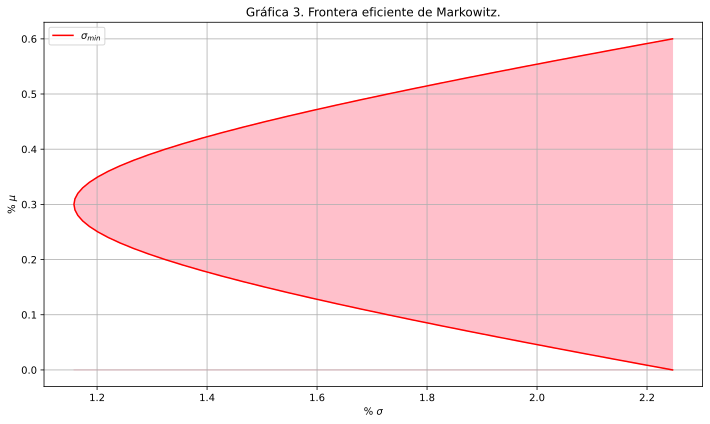

In [4]:
# Función que calcula la frontera eficiente de Markowitz...
def frontera_eficiente_Markowitz(mu_dom, A, P, Q):
    '''
    Calcula la frontera eficiente de Markowitz.

    Parámetros
    ----------
    mu_dom : dominio de valores de retornos esperados mu.
    A : matriz A de la explicación del apartado anterior.
    P, Q : matrices de cálculos intermedios.

    Retorno
    -------
    Vector de valores de riesgo mínimo para cada valor de retorno esperado mu.
    '''
    ret_sigma_min = []
    detA = np.linalg.det(A)

    for m in mu_dom:
        B1 = np.array([[1, A[0,1]], [m, A[1,1]]])
        B2 = np.array([[A[0,0], 1], [A[1,0], m]])
        detB1 = np.linalg.det(B1)
        detB2 = np.linalg.det(B2)
        w = (detB1*P + detB2*Q)/detA
        s2 = w @ C @ w.T
        s = math.sqrt(s2)
        ret_sigma_min.append(s)

    return np.array(ret_sigma_min)

# Hago los cálculos matriciales...
mc = mu @ Cinv
mu_tras = mu.T
a11 = denominador
a12 = mc @ unos_tras
a21 = numerador @ mu_tras # = a12
a22 = mc @ mu_tras
A = np.array([[a11, a12], [a21, a22]])
mu_dom = np.arange(0, 0.0061, 0.0001)

# Calcula la frontera eficiente de Markowitz...
sigma_min = frontera_eficiente_Markowitz(mu_dom, A, numerador, mc)

# Pinta la gráfica de la frontera eficiente de Markowitz...
fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()
ax.xaxis.set_major_formatter(lambda val, pos: str(round(val*100, 2)))
ax.yaxis.set_major_formatter(lambda val, pos: str(round(val*100, 2)))
ax.fill_between(sigma_min, mu_dom, color='pink')
plt.plot(sigma_min, mu_dom, label=r'$\sigma_{min}$', color='red')
plt.title('Gráfica 3. Frontera eficiente de Markowitz.')
plt.xlabel('% $\sigma$')
plt.ylabel('% $\mu$')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


# 5. Conclusiones.

Como puede observarse en la *Gráfica 3*, se ha pintado la *frontera eficiente de Markowitz* en *rojo* que son los puntos con *riesgo $\sigma$ mínimo* para *retornos esperados $\mu$ prefijados* de la *cartera eficiente* u *óptima* según el *programa de minimización* $(2)$. Mientras que las zona interior sombreada en *rosa* o *zona convexa*, serían puntos $(\sigma,\mu)$ para cualquier cartera no eficiente.

El *riesgo mínimo absoluto* se da para $\mu\approx0.30\%=\mu^*$ que es justamenta para $\sigma\approx1\%=\sqrt{\sigma_\text{min}^2=0.01\%}$ que son precisamente los resultados obtenidos en el [Apartado 3](#Apartado_3_Out), es decir, el punto de riesgo mínimo sin prefijar el retorno esperado de la cartera.